<a href="https://colab.research.google.com/github/ranjitk11/myFirstProject/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd# read the dataset
import numpy as np# operations with arrays
import os#handling files
import matplotlib.pyplot as plt# visvuvalise the data in the form of graph
import seaborn as sns#graph module to plot the graph in a single line

In [38]:
df=pd.read_csv('/content/IRIS (1).csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
#to discribe the stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
#basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
#to display no of samples in each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [42]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

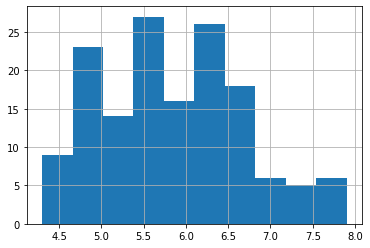

In [43]:
# Visvualize the data attribiutes with histogram
df['sepal_length'].hist()

<AxesSubplot:>

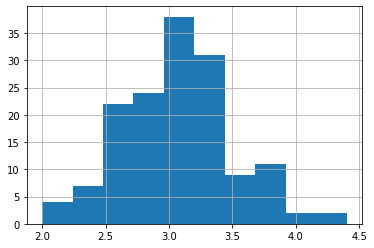

In [44]:
df['sepal_width'].hist()

<AxesSubplot:>

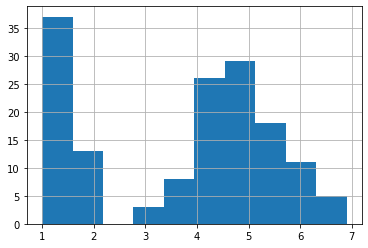

In [45]:
df['petal_length'].hist()

<AxesSubplot:>

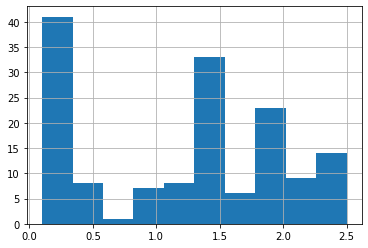

In [46]:
df['petal_width'].hist()

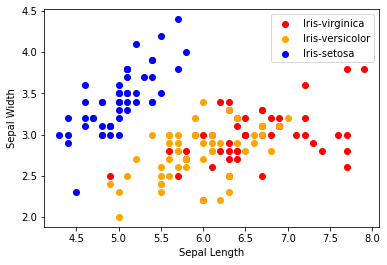

In [47]:
#scatter plot for each class
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']
#df.plot(kind='scatter',x='sepal_length',y='sepal_width') as this plots without the class classification
#we use a for loop
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

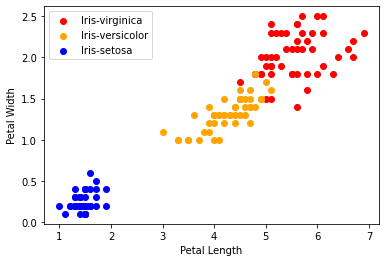

In [48]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()

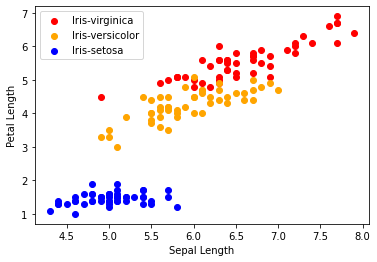

In [49]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()

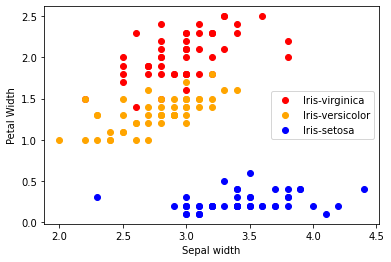

In [50]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('Sepal width')
    plt.ylabel('Petal Width')
    plt.legend()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

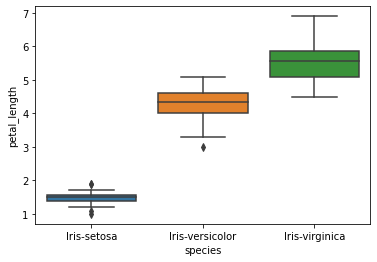

In [51]:
sns.boxplot(data=df,x='species',y='petal_length')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

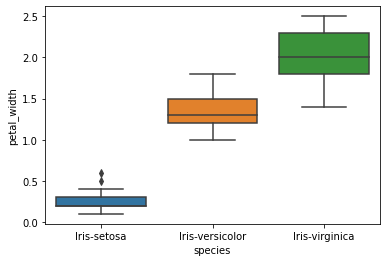

In [52]:
sns.boxplot(data=df,x='species',y='petal_width')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

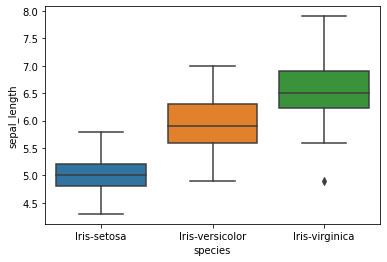

In [53]:
sns.boxplot(data=df,x='species',y='sepal_length')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

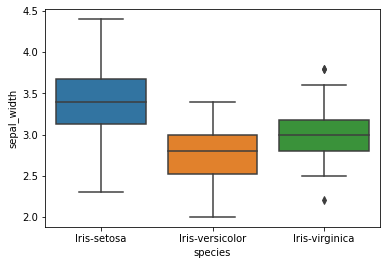

In [54]:
sns.boxplot(data=df,x='species',y='sepal_width')

In [55]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

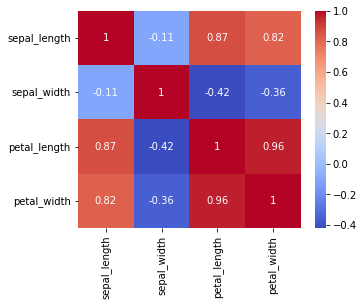

In [56]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')#annot=True will display the result in the matrix
#high intensity of red=high correlation;blue=negative correlation;light color rep no correlation. as we have only 4 variable.. we are not neglectling any variable

In [57]:
# as the output Species is in catogorical form(object type) we are converting them to a numerical form for that we use label encoder

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
df['species']=le.fit_transform(df['species'])
df.head()
#species has turned into numerical value

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
#we need a train data and test data to validate
from sklearn.model_selection import train_test_split
#train-70%
#test-30%
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [61]:
#Logistic regression; though it has a name Regression it is a clossification model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()# model=object with the Logistic regression function

In [62]:
#to train the data we use fit function with input(independent)parameters and output(dependent)parameters.
model.fit(x_train,y_train)

LogisticRegression()

In [63]:
#print matric to get performance 
print("Accuracy :",model.score(x_test,y_test)*100)#multiplying by 100 to display in percentage format

Accuracy : 95.55555555555556


In [64]:
#knn-K-nearnest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [65]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
print("Accuracy :",model.score(x_test,y_test)*100)#multiplying by 100 to display in percentage format

Accuracy : 95.55555555555556


In [67]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [68]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
print("Accuracy :",model.score(x_test,y_test)*100)#multiplying by 100 to display in percentage format

Accuracy : 93.33333333333333
